In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [5]:
# START - Load Integer dataset: heart_integer_v01.csv
data2 = pd.read_csv('data/cleaned data/kaggle data/encoded_kaggleheart.csv')  # erics folder

data2.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_Female,Sex_Male,ChestPainType_Asymptomatic,...,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Left Ventricular Hypertrophy,RestingECG_Normal,RestingECG_ST-T Wave Abnormality,ExerciseAngina_No,ExerciseAngina_Yes,ST_Slope_Downsloping,ST_Slope_Flat,ST_Slope_Upsloping
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,39,120,339,0,170,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6,45,130,237,0,170,0.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,54,110,208,0,142,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,37,140,207,0,130,1.5,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,48,120,284,0,120,0.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [3]:
# Drop specified columns // DONT NEED COLUMNS b/c Binary Output: M/F
columns_to_drop = ['Sex_f', 'ExerciseAngina_n']
data2 = data2.drop(columns=columns_to_drop)

# Verify the changes
print(data2.columns)

KeyError: "['Sex_f', 'ExerciseAngina_n'] not found in axis"

In [6]:
# rename DataFrame variable
encoded_data = data2.copy()

In [2]:
#choose which encoded data to run the kaggle data(919 rows of data) or raw data(303 rows of data)
### encoded_data = pd.read_csv('data/cleaned data/kaggle data/encoded_kaggleheart.csv')

#encoded_data = pd.read_csv('data/cleaned data/raw data/encoded_rawheart.csv')

### encoded_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_Female,Sex_Male,ChestPainType_Asymptomatic,...,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_Left Ventricular Hypertrophy,RestingECG_Normal,RestingECG_ST-T Wave Abnormality,ExerciseAngina_No,ExerciseAngina_Yes,ST_Slope_Downsloping,ST_Slope_Flat,ST_Slope_Upsloping
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
# Check if data is loaded
if encoded_data is not None:
    # Split into features (X) and target variable (y)
    X = encoded_data.drop('HeartDisease', axis=1)
    y = encoded_data['HeartDisease']

    # Split the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Parameter ranges
    n_estimators_range = np.arange(50, 301, 10)
    max_depth_range = np.arange(5, 31, 1)

    # Total combinations
    total_combinations = len(n_estimators_range) * len(max_depth_range)
    current_combination = 0

    # DataFrame to store results
    results_df = pd.DataFrame(columns=["n_estimators", "max_depth", "Accuracy", "Precision", "Recall", "R2_Score"])

    # Grid search over parameters
    for n in n_estimators_range:
        for depth in max_depth_range:
            current_combination += 1
            model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Append results to the dataframe
            new_row = pd.DataFrame({
                "n_estimators": [n], 
                "max_depth": [depth], 
                "Accuracy": [accuracy], 
                "Precision": [precision],
                "Recall": [recall],
                "R2_Score": [r2]
            })
            results_df = pd.concat([results_df, new_row], ignore_index=True)

            # Calculate and print progress
            progress_percentage = (current_combination / total_combinations) * 100
            print(f"Loaded successfully for parameters: n_estimators={n}, max_depth={depth}. Progress: {progress_percentage:.2f}% done")

            
            
    # Sort and display the results
    sorted_results = results_df.sort_values(by="Accuracy", ascending=False)
    display(sorted_results.head(20))
    
    
    
    # Find the row with the highest accuracy to get the optimal parameters
    optimal_row = results_df.loc[results_df['Accuracy'].idxmax()]

    # Extract the optimal parameters and corresponding scores
    optimal_n_estimators = int(optimal_row['n_estimators'])
    optimal_max_depth = int(optimal_row['max_depth'])
    optimal_accuracy = optimal_row['Accuracy']
    optimal_precision = optimal_row['Precision']
    optimal_recall = optimal_row['Recall']
    optimal_r2_score = optimal_row['R2_Score']

    # Print out the optimal parameters and scores
    print(f"n_estimators: {optimal_n_estimators}")
    print(f"max_depth: {optimal_max_depth}")
    print(f"Optimal Accuracy: {optimal_accuracy:.4f}")
    print(f"Optimal Precision: {optimal_precision:.4f}")
    print(f"Optimal Recall: {optimal_recall:.4f}")
    print(f"Optimal R2 Score: {optimal_r2_score:.4f}")

    # Initialize and train the RandomForestClassifier with the optimal parameters
    optimal_rf_model = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
    optimal_rf_model.fit(X_train, y_train)



else:
    print("No data available.")

Loaded successfully for parameters: n_estimators=50, max_depth=5. Progress: 0.15% done
Loaded successfully for parameters: n_estimators=50, max_depth=6. Progress: 0.30% done
Loaded successfully for parameters: n_estimators=50, max_depth=7. Progress: 0.44% done
Loaded successfully for parameters: n_estimators=50, max_depth=8. Progress: 0.59% done
Loaded successfully for parameters: n_estimators=50, max_depth=9. Progress: 0.74% done
Loaded successfully for parameters: n_estimators=50, max_depth=10. Progress: 0.89% done
Loaded successfully for parameters: n_estimators=50, max_depth=11. Progress: 1.04% done
Loaded successfully for parameters: n_estimators=50, max_depth=12. Progress: 1.18% done
Loaded successfully for parameters: n_estimators=50, max_depth=13. Progress: 1.33% done
Loaded successfully for parameters: n_estimators=50, max_depth=14. Progress: 1.48% done
Loaded successfully for parameters: n_estimators=50, max_depth=15. Progress: 1.63% done
Loaded successfully for parameters: n

Loaded successfully for parameters: n_estimators=80, max_depth=21. Progress: 14.05% done
Loaded successfully for parameters: n_estimators=80, max_depth=22. Progress: 14.20% done
Loaded successfully for parameters: n_estimators=80, max_depth=23. Progress: 14.35% done
Loaded successfully for parameters: n_estimators=80, max_depth=24. Progress: 14.50% done
Loaded successfully for parameters: n_estimators=80, max_depth=25. Progress: 14.64% done
Loaded successfully for parameters: n_estimators=80, max_depth=26. Progress: 14.79% done
Loaded successfully for parameters: n_estimators=80, max_depth=27. Progress: 14.94% done
Loaded successfully for parameters: n_estimators=80, max_depth=28. Progress: 15.09% done
Loaded successfully for parameters: n_estimators=80, max_depth=29. Progress: 15.24% done
Loaded successfully for parameters: n_estimators=80, max_depth=30. Progress: 15.38% done
Loaded successfully for parameters: n_estimators=90, max_depth=5. Progress: 15.53% done
Loaded successfully fo

Loaded successfully for parameters: n_estimators=120, max_depth=9. Progress: 27.66% done
Loaded successfully for parameters: n_estimators=120, max_depth=10. Progress: 27.81% done
Loaded successfully for parameters: n_estimators=120, max_depth=11. Progress: 27.96% done
Loaded successfully for parameters: n_estimators=120, max_depth=12. Progress: 28.11% done
Loaded successfully for parameters: n_estimators=120, max_depth=13. Progress: 28.25% done
Loaded successfully for parameters: n_estimators=120, max_depth=14. Progress: 28.40% done
Loaded successfully for parameters: n_estimators=120, max_depth=15. Progress: 28.55% done
Loaded successfully for parameters: n_estimators=120, max_depth=16. Progress: 28.70% done
Loaded successfully for parameters: n_estimators=120, max_depth=17. Progress: 28.85% done
Loaded successfully for parameters: n_estimators=120, max_depth=18. Progress: 28.99% done
Loaded successfully for parameters: n_estimators=120, max_depth=19. Progress: 29.14% done
Loaded succ

Loaded successfully for parameters: n_estimators=150, max_depth=23. Progress: 41.27% done
Loaded successfully for parameters: n_estimators=150, max_depth=24. Progress: 41.42% done
Loaded successfully for parameters: n_estimators=150, max_depth=25. Progress: 41.57% done
Loaded successfully for parameters: n_estimators=150, max_depth=26. Progress: 41.72% done
Loaded successfully for parameters: n_estimators=150, max_depth=27. Progress: 41.86% done
Loaded successfully for parameters: n_estimators=150, max_depth=28. Progress: 42.01% done
Loaded successfully for parameters: n_estimators=150, max_depth=29. Progress: 42.16% done
Loaded successfully for parameters: n_estimators=150, max_depth=30. Progress: 42.31% done
Loaded successfully for parameters: n_estimators=160, max_depth=5. Progress: 42.46% done
Loaded successfully for parameters: n_estimators=160, max_depth=6. Progress: 42.60% done
Loaded successfully for parameters: n_estimators=160, max_depth=7. Progress: 42.75% done
Loaded succes

Loaded successfully for parameters: n_estimators=190, max_depth=11. Progress: 54.88% done
Loaded successfully for parameters: n_estimators=190, max_depth=12. Progress: 55.03% done
Loaded successfully for parameters: n_estimators=190, max_depth=13. Progress: 55.18% done
Loaded successfully for parameters: n_estimators=190, max_depth=14. Progress: 55.33% done
Loaded successfully for parameters: n_estimators=190, max_depth=15. Progress: 55.47% done
Loaded successfully for parameters: n_estimators=190, max_depth=16. Progress: 55.62% done
Loaded successfully for parameters: n_estimators=190, max_depth=17. Progress: 55.77% done
Loaded successfully for parameters: n_estimators=190, max_depth=18. Progress: 55.92% done
Loaded successfully for parameters: n_estimators=190, max_depth=19. Progress: 56.07% done
Loaded successfully for parameters: n_estimators=190, max_depth=20. Progress: 56.21% done
Loaded successfully for parameters: n_estimators=190, max_depth=21. Progress: 56.36% done
Loaded suc

Loaded successfully for parameters: n_estimators=220, max_depth=25. Progress: 68.49% done
Loaded successfully for parameters: n_estimators=220, max_depth=26. Progress: 68.64% done
Loaded successfully for parameters: n_estimators=220, max_depth=27. Progress: 68.79% done
Loaded successfully for parameters: n_estimators=220, max_depth=28. Progress: 68.93% done
Loaded successfully for parameters: n_estimators=220, max_depth=29. Progress: 69.08% done
Loaded successfully for parameters: n_estimators=220, max_depth=30. Progress: 69.23% done
Loaded successfully for parameters: n_estimators=230, max_depth=5. Progress: 69.38% done
Loaded successfully for parameters: n_estimators=230, max_depth=6. Progress: 69.53% done
Loaded successfully for parameters: n_estimators=230, max_depth=7. Progress: 69.67% done
Loaded successfully for parameters: n_estimators=230, max_depth=8. Progress: 69.82% done
Loaded successfully for parameters: n_estimators=230, max_depth=9. Progress: 69.97% done
Loaded successf

Loaded successfully for parameters: n_estimators=260, max_depth=13. Progress: 82.10% done
Loaded successfully for parameters: n_estimators=260, max_depth=14. Progress: 82.25% done
Loaded successfully for parameters: n_estimators=260, max_depth=15. Progress: 82.40% done
Loaded successfully for parameters: n_estimators=260, max_depth=16. Progress: 82.54% done
Loaded successfully for parameters: n_estimators=260, max_depth=17. Progress: 82.69% done
Loaded successfully for parameters: n_estimators=260, max_depth=18. Progress: 82.84% done
Loaded successfully for parameters: n_estimators=260, max_depth=19. Progress: 82.99% done
Loaded successfully for parameters: n_estimators=260, max_depth=20. Progress: 83.14% done
Loaded successfully for parameters: n_estimators=260, max_depth=21. Progress: 83.28% done
Loaded successfully for parameters: n_estimators=260, max_depth=22. Progress: 83.43% done
Loaded successfully for parameters: n_estimators=260, max_depth=23. Progress: 83.58% done
Loaded suc

Loaded successfully for parameters: n_estimators=290, max_depth=27. Progress: 95.71% done
Loaded successfully for parameters: n_estimators=290, max_depth=28. Progress: 95.86% done
Loaded successfully for parameters: n_estimators=290, max_depth=29. Progress: 96.01% done
Loaded successfully for parameters: n_estimators=290, max_depth=30. Progress: 96.15% done
Loaded successfully for parameters: n_estimators=300, max_depth=5. Progress: 96.30% done
Loaded successfully for parameters: n_estimators=300, max_depth=6. Progress: 96.45% done
Loaded successfully for parameters: n_estimators=300, max_depth=7. Progress: 96.60% done
Loaded successfully for parameters: n_estimators=300, max_depth=8. Progress: 96.75% done
Loaded successfully for parameters: n_estimators=300, max_depth=9. Progress: 96.89% done
Loaded successfully for parameters: n_estimators=300, max_depth=10. Progress: 97.04% done
Loaded successfully for parameters: n_estimators=300, max_depth=11. Progress: 97.19% done
Loaded successf

,n_estimators,max_depth,Accuracy,Precision,Recall,R2_Score
57,70,10,0.896739,0.907407,0.915888,0.575677
31,60,10,0.896739,0.907407,0.915888,0.575677
161,110,10,0.891304,0.914286,0.897196,0.553344
109,90,10,0.891304,0.914286,0.897196,0.553344
137,100,12,0.891304,0.914286,0.897196,0.553344
135,100,10,0.891304,0.914286,0.897196,0.553344
187,120,10,0.891304,0.914286,0.897196,0.553344
83,80,10,0.891304,0.914286,0.897196,0.553344
205,120,28,0.885870,0.913462,0.887850,0.531011
204,120,27,0.885870,0.913462,0.887850,0.531011


n_estimators: 60
max_depth: 10
Optimal Accuracy: 0.8967
Optimal Precision: 0.9074
Optimal Recall: 0.9159
Optimal R2 Score: 0.5757


In [8]:
# Predict on the test data
y_pred = optimal_rf_model.predict(X_test)

# Calculate metrics
validation_accuracy = accuracy_score(y_test, y_pred)
validation_precision = precision_score(y_test, y_pred)
validation_recall = recall_score(y_test, y_pred)
validation_r2_score = r2_score(y_test, y_pred)

# Print the validation metrics
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Precision: {validation_precision:.4f}")
print(f"Validation Recall: {validation_recall:.4f}")
print(f"Validation R2 Score: {validation_r2_score:.4f}")
print(f"Validated with n_estimators: {optimal_n_estimators}")
print(f"Validated with max_depth: {optimal_max_depth}")

Validation Accuracy: 0.8967
Validation Precision: 0.9074
Validation Recall: 0.9159
Validation R2 Score: 0.5757
Validated with n_estimators: 60
Validated with max_depth: 10


In [5]:
### sorted_results.to_csv('results/RandomForestClassifier_ModelOptimizationTable.csv',index=False)

In [9]:
# Set up the parameter grid
param_grid = {
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False],
    'n_estimators': [optimal_n_estimators],
    'max_depth': [optimal_max_depth]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Save the optimal parameters to variables
optimal_min_samples_split = best_params['min_samples_split']
optimal_min_samples_leaf = best_params['min_samples_leaf']

optimal_bootstrap = best_params['bootstrap']

# Print the best parameters and the corresponding score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score achieved: {grid_search.best_score_}")

optimal_rf_model = RandomForestClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_split,
    min_samples_leaf=optimal_min_samples_leaf,
    random_state=42
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 60}
Best score achieved: 0.8773646444879322


In [10]:
# Fit the model to the training data
optimal_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = optimal_rf_model.predict(X_test)

# Calculate metrics
optimal_accuracy = accuracy_score(y_test, y_pred)
optimal_precision = precision_score(y_test, y_pred)
optimal_recall = recall_score(y_test, y_pred)
optimal_r2_score = r2_score(y_test, y_pred)

# Print out the metrics
print(f"Optimal Accuracy: {optimal_accuracy:.4f}")
print(f"Optimal Precision: {optimal_precision:.4f}")
print(f"Optimal Recall: {optimal_recall:.4f}")
print(f"Optimal R2 Score: {optimal_r2_score:.4f}")

Optimal Accuracy: 0.8804
Optimal Precision: 0.8972
Optimal Recall: 0.8972
Optimal R2 Score: 0.5087
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estima

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_

In [21]:
# Fit the model to the training data
optimal_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = optimal_rf_model.predict(X_test)

# Calculate metrics
optimal_accuracy = accuracy_score(y_test, y_pred)
optimal_precision = precision_score(y_test, y_pred)
optimal_recall = recall_score(y_test, y_pred)
optimal_r2_score = r2_score(y_test, y_pred)

# Creating a DataFrame for the optimal parameters and metrics
optimal_params_df = pd.DataFrame({
    'Parameter': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'bootstrap', 'Accuracy', 'Precision', 'Recall', 'R2 Score'],
    'Optimal Value': [
        optimal_rf_model.n_estimators, 
        optimal_rf_model.max_depth, 
        optimal_rf_model.min_samples_split,
        optimal_rf_model.min_samples_leaf,
        optimal_rf_model.bootstrap,
        optimal_accuracy, 
        optimal_precision, 
        optimal_recall, 
        optimal_r2_score
    ]
})

# Display the DataFrame
print("Optimal Parameters and Model Performance:")
display(optimal_params_df)

Optimal Parameters and Model Performance:


,Parameter,Optimal Value
0,n_estimators,50
1,max_depth,15
2,min_samples_split,8
3,min_samples_leaf,1
4,bootstrap,True
5,Accuracy,0.891304
6,Precision,0.930693
7,Recall,0.878505
8,R2 Score,0.553344


[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_s

[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_s

[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_

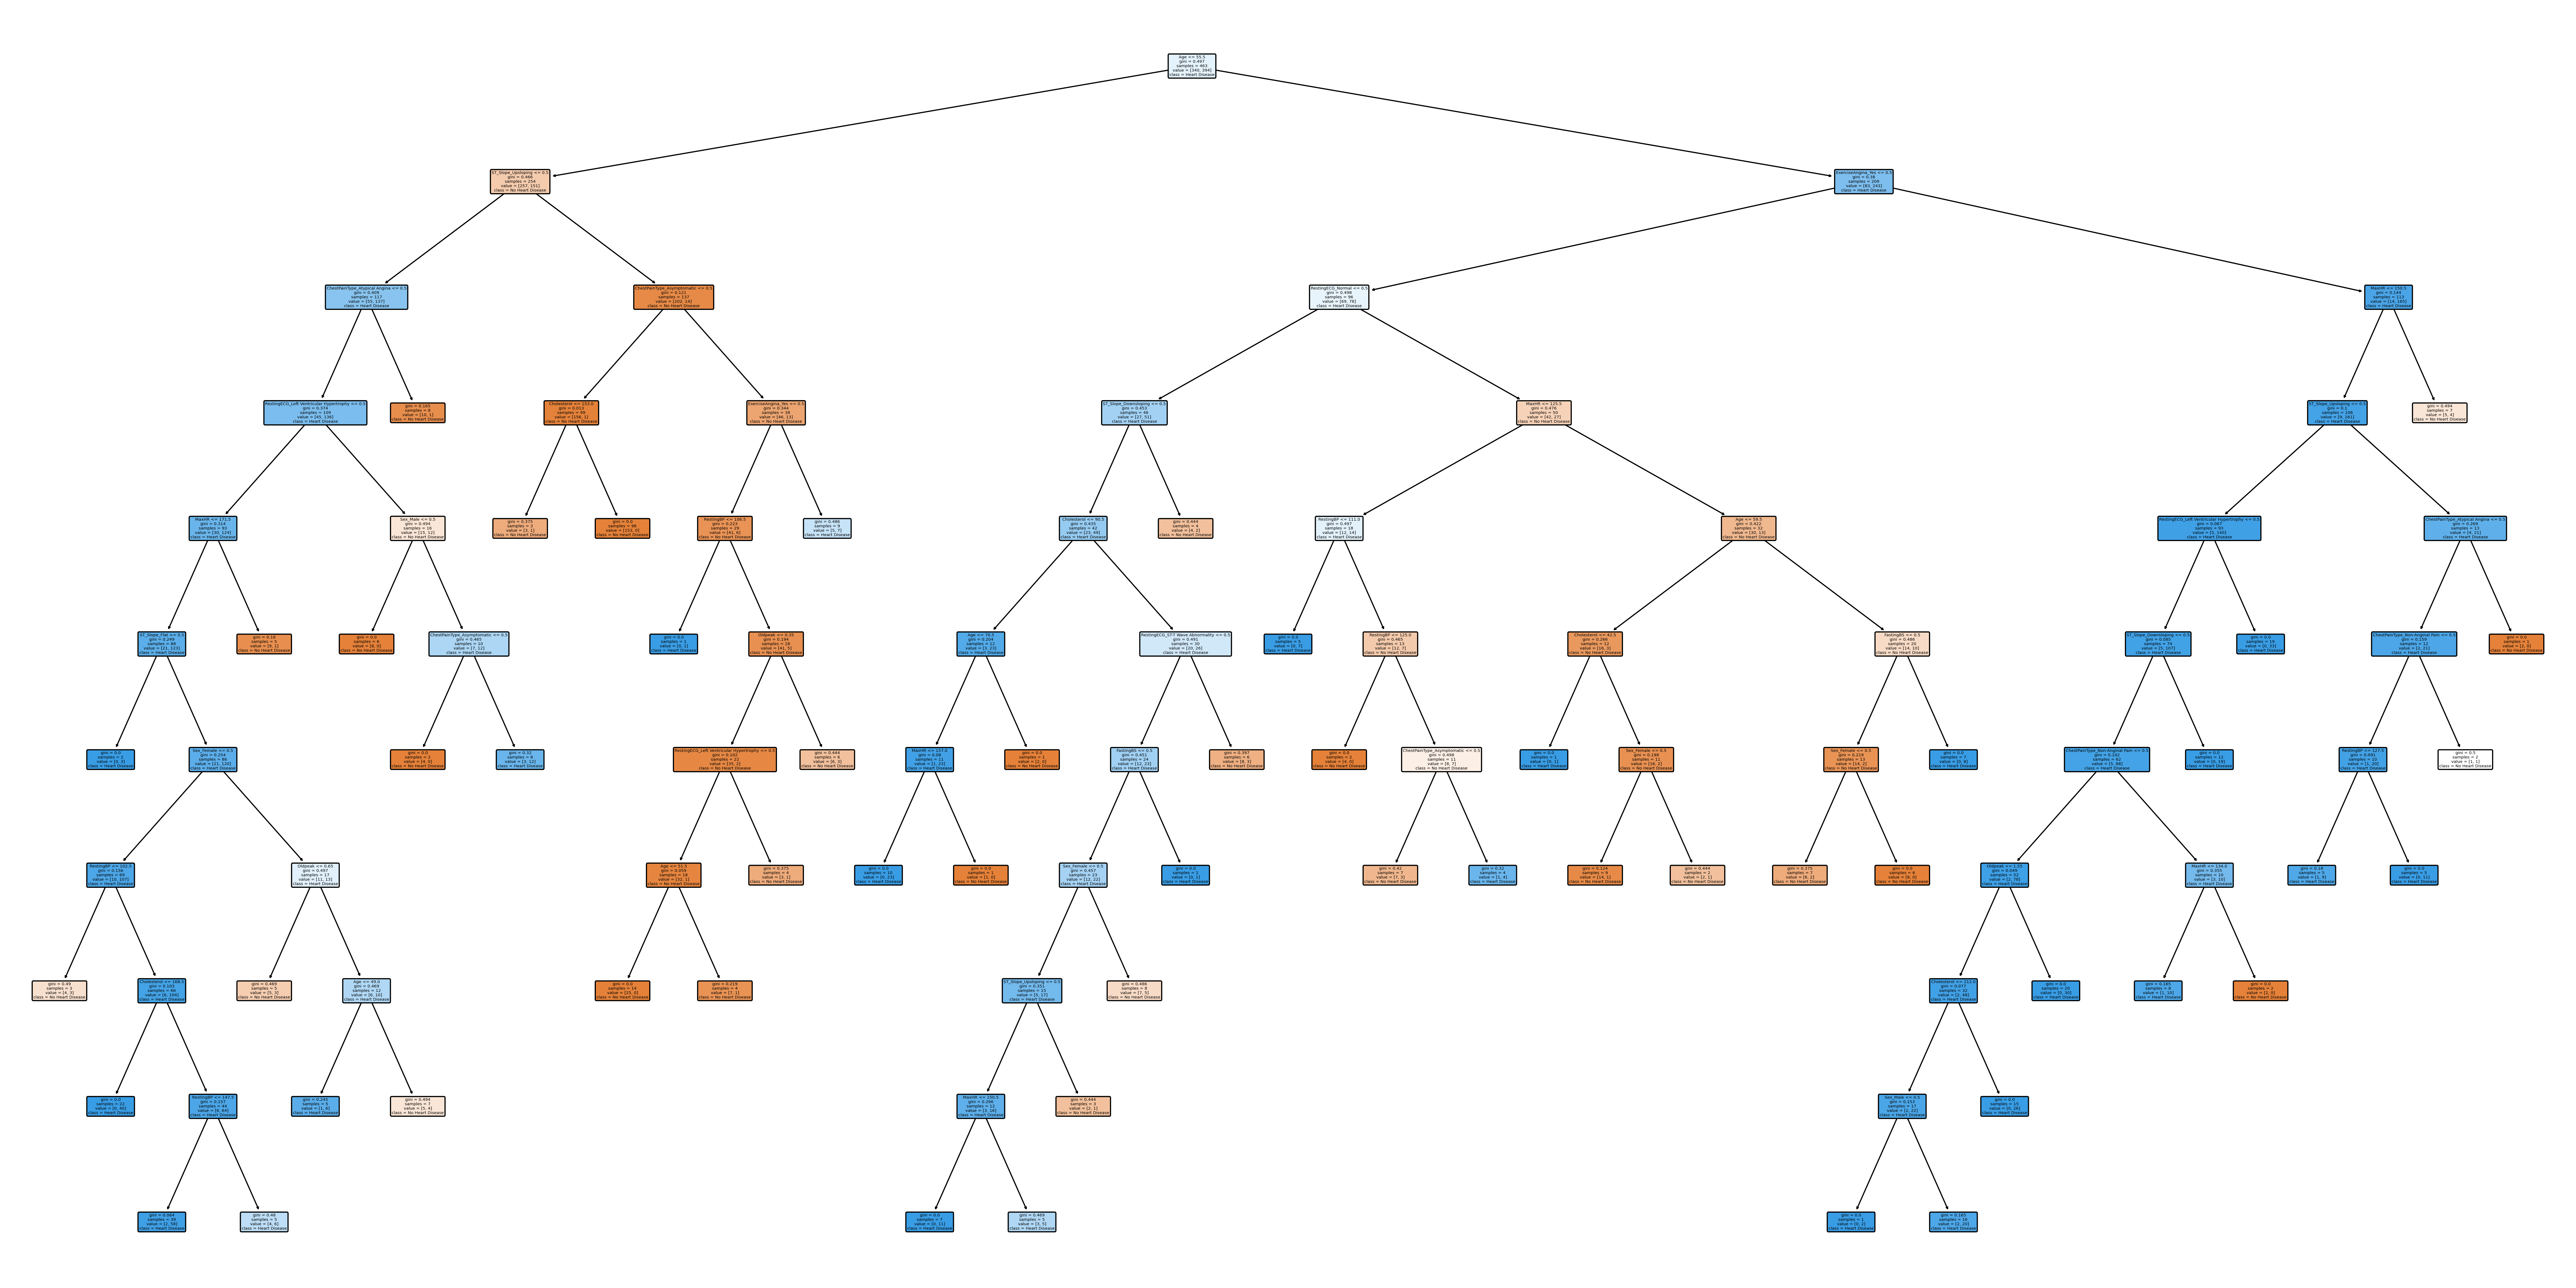

In [9]:
# Assuming 'optimal_rf_model' is your trained RandomForestClassifier
# Extract one of the trees from the forest (e.g., the first tree)
single_tree = optimal_rf_model.estimators_[0]

# Set the size of the figure
plt.figure(figsize=(40, 20), dpi=300)

# Plot the tree
plot_tree(single_tree,
          feature_names=X_train.columns,  
          class_names=["No Heart Disease", "Heart Disease"],
          filled=True, rounded=True)

# Save the figure
plt.savefig('results/optimalRFmodel_singletree.png')

# Then show the plot
plt.show()

# Close the plot window after displaying
plt.close()